Digit Recognizer
MNIST Data

In [110]:
import json
import requests
import pandas as pd
import torch
#Import Torch Neural Network module
import torch.nn as nn
# Torchvision is the torch module for image processing
import torchvision
import torchvision.transforms as transforms

In [114]:
transform = transforms.Compose(
    [transforms.Resize((28,28)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

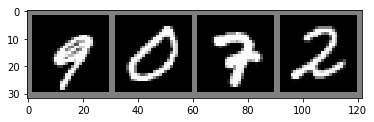

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [116]:
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

    9     0     7     2


In [117]:
for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        print(inputs.shape)
        print(labels)
        break

torch.Size([4, 1, 28, 28])
tensor([3, 4, 2, 7])


In [118]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        # This nn has 4 hidden layers and 1 output layer. Of the 4 hidden layers, there are two convolutional
        # and two linear (Feed Forward?)
        
        super(Net, self).__init__()
        # 3 input channels, 6 output channels, 5 kernel size
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        # 6 input channels, 16 output channels, 5 kernel size
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
#         print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
#         print(x.shape)
        # Reshape the tensor to the correct dimension. Here '-1' means that we do not know how many rows there are. 
        # System will compute the correct number of rows based on the column requirements we have given
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [119]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [120]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.181
[1,  4000] loss: 0.196
[1,  6000] loss: 0.127
[1,  8000] loss: 0.108
[1, 10000] loss: 0.103
[1, 12000] loss: 0.075
[1, 14000] loss: 0.081
[2,  2000] loss: 0.057
[2,  4000] loss: 0.064
[2,  6000] loss: 0.055
[2,  8000] loss: 0.056
[2, 10000] loss: 0.063
[2, 12000] loss: 0.054
[2, 14000] loss: 0.061
Finished Training


GroundTruth:      7     2     1     0


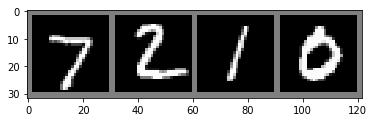

In [121]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [122]:
outputs = net(images)
print(outputs)

tensor([[-1.8593, -1.1977, -1.9430, -0.0004, -1.9558,  0.8216, -8.1921, 14.2828,
         -2.3604,  4.4659],
        [ 2.9450,  5.5495, 11.5205, -2.6427, -0.5537, -6.2257, -2.4461, -2.7504,
         -1.2337, -2.8833],
        [-1.4112,  9.4344, -0.3336, -3.8850,  0.7361, -1.1081,  0.1351,  0.3034,
          0.3630, -1.4714],
        [12.6221, -1.7129, -3.8085, -2.9025, -2.9078,  1.8086,  4.7072, -1.8512,
          2.0431,  0.6343]], grad_fn=<ThAddmmBackward>)


In [123]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
print(predicted)

Predicted:      7     2     1     0
tensor([7, 2, 1, 0])


In [124]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 500 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 500 test images: 98 %


In [125]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 99 %
Accuracy of     2 : 97 %
Accuracy of     3 : 97 %
Accuracy of     4 : 98 %
Accuracy of     5 : 98 %
Accuracy of     6 : 99 %
Accuracy of     7 : 98 %
Accuracy of     8 : 99 %
Accuracy of     9 : 97 %


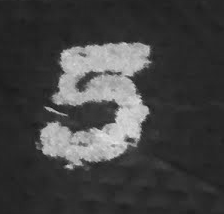

In [205]:
# Test it with a custom image
from PIL import Image, ImageOps
IMG_URL = "/Users/balakumaranpanneerselvam/Downloads/PS_Test2.png"
# response = requests.get(IMG_URL)
img_pil = Image.open(IMG_URL).convert('L')
img_pil = ImageOps.invert(img_pil)
img_pil

In [206]:
# Convert the image to greyscale and change the dimensions to 28 * 28
# transform = transforms.Compose(
#     [transforms.Resize((28,28)),
#      transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

img_tensor = transform(img_pil)
img_tensor.unsqueeze_(0)
# img_tensor.unsqueeze_(0)
# img_tensor = img_tensor[0,27,27]
img_tensor.shape

torch.Size([1, 1, 28, 28])

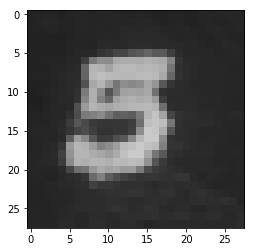

In [207]:
# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(npimg)

imshow(torchvision.utils.make_grid(img_tensor))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [208]:
outputs = net(img_tensor)
print(outputs)

tensor([[-0.5700, -0.8465, -0.3910,  1.1543, -0.9292,  2.0024, -1.1022, -0.4760,
          1.4129,  1.1461]], grad_fn=<ThAddmmBackward>)


In [209]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))
print(predicted)

Predicted:      5
tensor([5])
